In [65]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [66]:
data = pd.read_csv('encoded_data.csv', index_col='index')

In [68]:
X = data.drop('renewable',axis=1)
y = data['renewable']

In [69]:
X=(X-X.min())/(X.max()-X.min())

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

In [71]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=250, max_depth=5, learning_rate=0.01)
model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_valid, y_valid)], 
          early_stopping_rounds=20)

c:\Users\suyas\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:6768.73331	validation_1-rmse:6730.22036
[1]	validation_0-rmse:6722.64142	validation_1-rmse:6683.56405
[2]	validation_0-rmse:6677.15798	validation_1-rmse:6637.51789
[3]	validation_0-rmse:6632.27439	validation_1-rmse:6592.08069
[4]	validation_0-rmse:6587.98700	validation_1-rmse:6547.24342
[5]	validation_0-rmse:6544.29212	validation_1-rmse:6502.99331
[6]	validation_0-rmse:6501.15310	validation_1-rmse:6459.32535
[7]	validation_0-rmse:6458.61822	validation_1-rmse:6416.24585
[8]	validation_0-rmse:6416.63004	validation_1-rmse:6373.72129
[9]	validation_0-rmse:6375.23665	validation_1-rmse:6331.76962
[10]	validation_0-rmse:6334.37600	validation_1-rmse:6290.38315
[11]	validation_0-rmse:6294.09825	validation_1-rmse:6249.55065
[12]	validation_0-rmse:6254.34128	validation_1-rmse:6209.26956
[13]	validation_0-rmse:6215.12961	validation_1-rmse:6169.53765
[14]	validation_0-rmse:6176.48096	validation_1-rmse:6130.34284
[15]	validation_0-rmse:6138.36457	validation_1-rmse:6091.68754
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
from sklearn.metrics import mean_absolute_percentage_error
predictions = model.predict(X_valid)
print("Mean Absolute Percentage Error: " + str(mean_absolute_percentage_error(predictions, y_valid)))

Mean Absolute Percentage Error: 1.1331960689508747


In [73]:
print(predictions[0:100])

[ 1088.289    2725.675     703.5158  19893.893    5748.5654   1995.7264
  3037.5027    703.5158   1004.9615    916.1167    685.6113    906.7338
  1004.9615  34884.71     1086.8706    906.7338    916.1167    906.7338
   683.0106   1004.14496  1003.35486  4919.574    1086.8706    808.49084
  1840.9594   1840.9594   1995.7264    916.1167   4919.574    1088.289
   785.90234   808.49084   707.9209    906.7338   1840.9594   1840.9594
  2056.9534   1088.289    7612.787     906.7338    656.63873  1995.7264
  1840.9594    685.23816  1840.9594   2056.9534   5942.999    1004.9615
  1088.289    1840.9594   1004.9615    750.3228   4919.574     658.5451
  1004.14496  1840.9594   1003.35486  1086.8706   1004.14496  1086.8706
   808.49084  1004.14496  1840.9594   1995.7264   1088.289    1995.7264
   683.0106   4614.755     906.7338   5902.187     788.50006   808.49084
  1003.35486   808.49084   750.3228   1003.35486  1840.9594   1002.7266
  1065.0905   1086.8706    917.7233    721.695    1002.7266   1

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: xlabel='index', ylabel='renewable'>

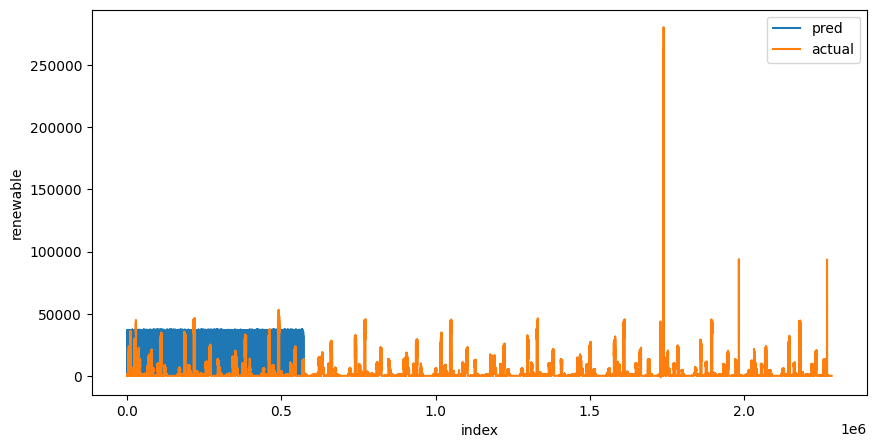

In [75]:
plt.figure(figsize=(10,5))
sns.lineplot(data=predictions, label='pred')
sns.lineplot(data=y_valid, label='actual')

In [77]:
model.save_model('model.json')